In [4]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
from plotly.io import show

plt.show()

package_path = '/Users/flaminia/Documents/work/ProMCDA' # change the path

if package_path not in sys.path:
    sys.path.append(package_path)

try:
    from promcda.models.ProMCDA import ProMCDA
    print("Import successful!")
except ModuleNotFoundError as e:
    print(f"ModuleNotFoundError: {e}")

from promcda.enums import NormalizationFunctions, AggregationFunctions, OutputColumnNames4Sensitivity, NormalizationNames4Sensitivity, PDFType

Import successful!


In [5]:
def setUpNoRobustnessIndicators():
    
    # Mock input data for testing
    input_matrix_without_uncertainty = pd.DataFrame({
        'Alternatives': ['A', 'B', 'C'],
        'Criteria 1': [0.5, 0.2, 0.8],
        'Criteria 2': [0.3, 0.6, 0.1]
    }, index=['A', 'B', 'C'])
   
    input_matrix_without_uncertainty.set_index('Alternatives', inplace=True)

    polarity = ('+', '-')

    weights = [0.9, 0.1]
    robustness_weights = False
    robustness_single_weights = False # change it for testing
    robustness_indicators = False # change it for testing

    marginal_distributions = (PDFType.NORMAL, PDFType.NORMAL)

    num_runs = 5
    num_cores = 1

    output_path = 'mock_output/'

    # Return the setup parameters as a dictionary
    return {
        'input_matrix': input_matrix_without_uncertainty, # Decide what type of input matrix
        'polarity': polarity,
        'robustness_weights': robustness_weights,
        'robustness_single_weights': robustness_single_weights,
        'robustness_indicators': robustness_indicators,
        'marginal_distributions': marginal_distributions,
        'num_runs': num_runs,
        'num_cores': num_cores,
        'output_path': output_path
    }

# Run the setup and store parameters in a variable
setup_no_robustness_indicators = setUpNoRobustnessIndicators()

# Check the setup parameters
setup_no_robustness_indicators

{'input_matrix':               Criteria 1  Criteria 2
 Alternatives                        
 A                    0.5         0.3
 B                    0.2         0.6
 C                    0.8         0.1,
 'polarity': ('+', '-'),
 'robustness_weights': False,
 'robustness_single_weights': False,
 'robustness_indicators': False,
 'marginal_distributions': (<PDFType.NORMAL: 'normal'>,
  <PDFType.NORMAL: 'normal'>),
 'num_runs': 5,
 'num_cores': 1,
 'output_path': 'mock_output/'}

In [47]:
def setUpRobustnessIndicators():
    
    # Mock input data for testing
    input_matrix_with_uncertainty = pd.DataFrame({
    'Alternatives': ['A', 'B', 'C'],
    'Criterion1_mean': [0.5, 0.2, 0.8],
    'Criterion1_std': [0.1, 0.02, 0.07],
    'Criterion2_mean': [0.3, 0.6, 0.1],
    'Criterion2_std': [0.03, 0.06, 0.01]
        })
   
    input_matrix_with_uncertainty.set_index('Alternatives', inplace=True)

    polarity = ('+', '-')

    robustness_weights = False
    robustness_single_weights = False
    robustness_indicators = True

    marginal_distributions = (PDFType.NORMAL, PDFType.NORMAL)

    num_runs = 5
    num_cores = 1

    output_path = 'mock_output/'

    # Return the setup parameters as a dictionary
    return {
        'input_matrix': input_matrix_with_uncertainty, # Decide what type of input matrix
        'polarity': polarity,
        'robustness_weights': robustness_weights,
        'robustness_indicators': robustness_indicators,
        'marginal_distributions': marginal_distributions,
        'num_runs': num_runs,
        'num_cores': num_cores,
        'output_path': output_path
    }

# Run the setup and store parameters in a variable
setup_robustness_indicators = setUpRobustnessIndicators()

# Check the setup parameters
setup_robustness_indicators

{'input_matrix':               Criterion1_mean  Criterion1_std  Criterion2_mean  Criterion2_std
 Alternatives                                                                  
 A                         0.5            0.10              0.3            0.03
 B                         0.2            0.02              0.6            0.06
 C                         0.8            0.07              0.1            0.01,
 'polarity': ('+', '-'),
 'robustness_weights': False,
 'robustness_indicators': True,
 'marginal_distributions': (<PDFType.NORMAL: 'normal'>,
  <PDFType.NORMAL: 'normal'>),
 'num_runs': 5,
 'num_cores': 1,
 'output_path': 'mock_output/'}

## TEST NO ROBUSTNESS ON INDICATORS - need setUpNoRobustnessIndicators

In [7]:
promcda = ProMCDA(
    input_matrix=setup_no_robustness_indicators['input_matrix'],
    polarity=setup_no_robustness_indicators['polarity'],
    robustness_weights=setup_no_robustness_indicators['robustness_weights'],
    robustness_indicators=setup_no_robustness_indicators['robustness_indicators'],
    marginal_distributions=setup_no_robustness_indicators['marginal_distributions'],
    num_runs=setup_no_robustness_indicators['num_runs'],
    num_cores=setup_no_robustness_indicators['num_cores'],
)

INFO: 2025-04-08 16:57:19,771 - ProMCDA - Alternatives are ['A', 'B', 'C']


### Test normalize with sensitivity¶

In [8]:
promcda.normalize()

INFO: 2025-04-08 17:00:07,587 - ProMCDA - Number of indicators: 2
INFO: 2025-04-08 17:00:07,588 - ProMCDA - Polarities are checked: ('+', '-')
INFO: 2025-04-08 17:00:07,589 - ProMCDA - Weights: [0.5, 0.5]
INFO: 2025-04-08 17:00:07,590 - ProMCDA - Normalized weights: [0.5, 0.5]


,Criteria 1_minmax_01,Criteria 2_minmax_01,Criteria 1_minmax_without_zero,Criteria 2_minmax_without_zero,Criteria 1_target_01,Criteria 2_target_01,Criteria 1_target_without_zero,Criteria 2_target_without_zero,Criteria 1_standardized_any,Criteria 2_standardized_any,Criteria 1_standardized_without_zero,Criteria 2_standardized_without_zero,Criteria 1_rank,Criteria 2_rank
0,0.5,0.6,0.55,0.64,0.625,0.5,0.6625,0.55,0.0,0.132453,1.1,1.292079,2.0,2.0
1,0.0,0.0,0.1,0.1,0.25,0.0,0.325,0.1,-1.0,-1.059626,0.1,0.1,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,0.833333,1.0,0.85,1.0,0.927173,2.1,2.086799,3.0,3.0


### Test normalize with specific method

In [9]:
promcda.normalize(NormalizationFunctions.MINMAX)

INFO: 2025-04-08 17:00:15,399 - ProMCDA - Number of indicators: 2
INFO: 2025-04-08 17:00:15,401 - ProMCDA - Polarities are checked: ('+', '-')
INFO: 2025-04-08 17:00:15,402 - ProMCDA - Weights: [0.5, 0.5]
INFO: 2025-04-08 17:00:15,404 - ProMCDA - Normalized weights: [0.5, 0.5]


,Criteria 1_minmax_01,Criteria 2_minmax_01,Criteria 1_minmax_without_zero,Criteria 2_minmax_without_zero
0,0.5,0.6,0.55,0.64
1,0.0,0.0,0.1,0.1
2,1.0,1.0,1.0,1.0


#### Example of plotting normalized indicator values

INFO: 2025-04-08 17:11:34,537 - ProMCDA - Number of indicators: 2
INFO: 2025-04-08 17:11:34,539 - ProMCDA - Polarities are checked: ('+', '-')
INFO: 2025-04-08 17:11:34,539 - ProMCDA - Weights: [0.5, 0.5]
INFO: 2025-04-08 17:11:34,540 - ProMCDA - Normalized weights: [0.5, 0.5]


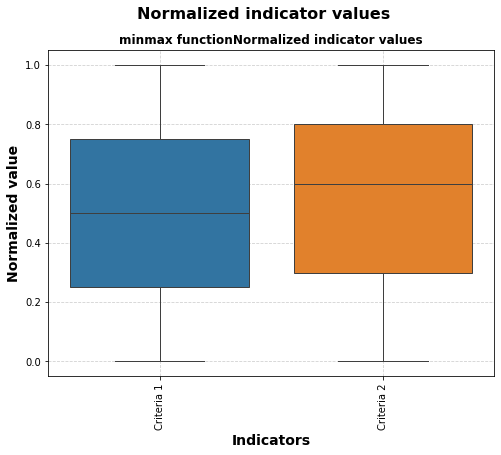

In [19]:
data_minmax = promcda.normalize(NormalizationFunctions.MINMAX)

filtered_columns = [col for col in data_minmax.columns if col.endswith("_minmax_01") and "without_zero" not in col]

import logging
import seaborn as sns
logging.getLogger('matplotlib').setLevel(logging.WARNING)

plt.figure(figsize=(8, 6))
sns.boxplot(data=data_minmax[filtered_columns]) 
plt.xticks(rotation=90)


clean_labels = [col.replace("_minmax_01", "") for col in filtered_columns]
plt.xticks(ticks=range(len(clean_labels)), labels=clean_labels, rotation=90)

plt.title("minmax functionNormalized indicator values", fontsize=12, fontweight='bold')
plt.suptitle("Normalized indicator values", fontsize=16, fontweight='bold')
plt.xlabel("Indicators", fontsize=14, fontweight='bold')
plt.ylabel("Normalized value", fontsize=14, fontweight='bold')

#plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [10]:
promcda.normalize(NormalizationFunctions.RANK)

INFO: 2025-04-08 17:00:20,294 - ProMCDA - Number of indicators: 2
INFO: 2025-04-08 17:00:20,296 - ProMCDA - Polarities are checked: ('+', '-')
INFO: 2025-04-08 17:00:20,296 - ProMCDA - Weights: [0.5, 0.5]
INFO: 2025-04-08 17:00:20,297 - ProMCDA - Normalized weights: [0.5, 0.5]


,Criteria 1_rank,Criteria 2_rank
0,2.0,2.0
1,1.0,1.0
2,3.0,3.0


### Test aggregate with full sensitivity

In [11]:
promcda.normalize()
promcda.aggregate()

INFO: 2025-04-08 17:00:27,149 - ProMCDA - Number of indicators: 2
INFO: 2025-04-08 17:00:27,151 - ProMCDA - Polarities are checked: ('+', '-')
INFO: 2025-04-08 17:00:27,151 - ProMCDA - Weights: [0.5, 0.5]
INFO: 2025-04-08 17:00:27,152 - ProMCDA - Normalized weights: [0.5, 0.5]
INFO: 2025-04-08 17:00:27,180 - ProMCDA - Number of indicators: 2
INFO: 2025-04-08 17:00:27,181 - ProMCDA - Polarities are checked: ('+', '-')
INFO: 2025-04-08 17:00:27,182 - ProMCDA - Weights: [0.5, 0.5]
INFO: 2025-04-08 17:00:27,182 - ProMCDA - Normalized weights: [0.5, 0.5]


,ws-minmax_01,ws-target_01,ws-standardized_any,ws-rank,geom-minmax_without_zero,geom-target_without_zero,geom-standardized_without_zero,geom-rank,harm-minmax_without_zero,harm-target_without_zero,harm-standardized_without_zero,harm-rank,min-standardized_any
0,0.55,0.5625,0.066227,2.0,0.593296,0.603635,1.192177,2.0,0.591597,0.601031,1.188328,2.0,0.0
1,0.0,0.125,-1.029813,1.0,0.100000,0.180278,0.100000,1.0,0.1,0.152941,0.1,1.0,-1.059626
2,1.0,0.916667,0.963586,3.0,1.000000,0.921954,2.093389,3.0,1.0,0.918919,2.093378,3.0,0.927173


In [12]:
scores = promcda.aggregate()

INFO: 2025-04-08 17:01:02,370 - ProMCDA - Number of indicators: 2
INFO: 2025-04-08 17:01:02,372 - ProMCDA - Polarities are checked: ('+', '-')
INFO: 2025-04-08 17:01:02,372 - ProMCDA - Weights: [0.5, 0.5]
INFO: 2025-04-08 17:01:02,373 - ProMCDA - Normalized weights: [0.5, 0.5]


#### Example of plotting the best alternative's score using different pairs of normalization and agregation functions

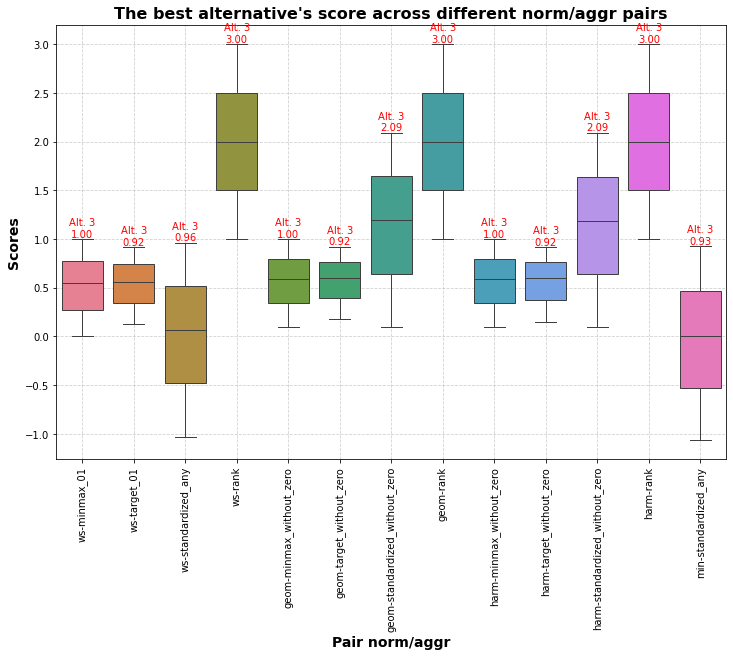

In [27]:
# Crea il boxplot
plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=scores)
plt.xticks(rotation=90)

# Annotazioni per i valori massimi
for i, col in enumerate(scores):
    max_value = scores[col].max()
    max_index = scores[col].idxmax()
    alternative = f'Alt. {max_index + 1}'
    plt.text(i, max_value, f'{alternative}\n{max_value:.2f}', ha='center', va='bottom', fontsize=10, color='red')

# Personalizza le etichette degli assi e il titolo
plt.xlabel("Pair norm/aggr", fontsize=14, fontweight='bold')
plt.ylabel("Scores", fontsize=14, fontweight='bold')
plt.title("The best alternative's score across different norm/aggr pairs", fontsize=16, fontweight='bold')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Test aggregate with sensitivity on aggregation

In [30]:
promcda.normalize(NormalizationFunctions.MINMAX)
promcda.aggregate()

INFO: 2025-04-08 18:21:58,091 - ProMCDA - Number of indicators: 2
INFO: 2025-04-08 18:21:58,092 - ProMCDA - Polarities are checked: ('+', '-')
INFO: 2025-04-08 18:21:58,093 - ProMCDA - Weights: [0.5, 0.5]
INFO: 2025-04-08 18:21:58,094 - ProMCDA - Normalized weights: [0.5, 0.5]
INFO: 2025-04-08 18:21:58,111 - ProMCDA - Number of indicators: 2
INFO: 2025-04-08 18:21:58,112 - ProMCDA - Polarities are checked: ('+', '-')
INFO: 2025-04-08 18:21:58,113 - ProMCDA - Weights: [0.5, 0.5]
INFO: 2025-04-08 18:21:58,114 - ProMCDA - Normalized weights: [0.5, 0.5]


,ws-minmax_01,geom-minmax_without_zero,harm-minmax_without_zero
0,0.55,0.593296,0.591597
1,0.0,0.100000,0.1
2,1.0,1.000000,1.0


### Test aggregate with sensitivity on normalization

In [31]:
promcda.normalize()
promcda.aggregate(aggregation_method=AggregationFunctions.WEIGHTED_SUM)

INFO: 2025-04-08 18:22:05,529 - ProMCDA - Number of indicators: 2
INFO: 2025-04-08 18:22:05,531 - ProMCDA - Polarities are checked: ('+', '-')
INFO: 2025-04-08 18:22:05,532 - ProMCDA - Weights: [0.5, 0.5]
INFO: 2025-04-08 18:22:05,532 - ProMCDA - Normalized weights: [0.5, 0.5]
INFO: 2025-04-08 18:22:05,570 - ProMCDA - Number of indicators: 2
INFO: 2025-04-08 18:22:05,571 - ProMCDA - Polarities are checked: ('+', '-')
INFO: 2025-04-08 18:22:05,571 - ProMCDA - Weights: [0.5, 0.5]
INFO: 2025-04-08 18:22:05,572 - ProMCDA - Normalized weights: [0.5, 0.5]


,ws-minmax_01,ws-target_01,ws-standardized_any,ws-rank
0,0.55,0.5625,0.066227,2.0
1,0.0,0.125,-1.029813,1.0
2,1.0,0.916667,0.963586,3.0


### Test aggregate with robustness on weights, fix methods

In [32]:
promcda = ProMCDA(
    input_matrix=setup_no_robustness_indicators['input_matrix'],
    polarity=setup_no_robustness_indicators['polarity'],
    robustness_weights=True,
    robustness_indicators=setup_no_robustness_indicators['robustness_indicators'],
    marginal_distributions=setup_no_robustness_indicators['marginal_distributions'],
    num_runs=setup_no_robustness_indicators['num_runs'],
    num_cores=setup_no_robustness_indicators['num_cores'],
    #output_path=setup_parameters['output_path']
)

INFO: 2025-04-08 18:22:10,066 - ProMCDA - Alternatives are ['A', 'B', 'C']


In [33]:
promcda.normalize(NormalizationFunctions.MINMAX)
promcda.aggregate(aggregation_method=AggregationFunctions.WEIGHTED_SUM)

INFO: 2025-04-08 18:22:10,778 - ProMCDA - Number of indicators: 2
INFO: 2025-04-08 18:22:10,780 - ProMCDA - Polarities are checked: ('+', '-')
INFO: 2025-04-08 18:22:10,793 - ProMCDA - Number of indicators: 2
INFO: 2025-04-08 18:22:10,795 - ProMCDA - Polarities are checked: ('+', '-')
INFO: 2025-04-08 18:22:10,795 - ProMCDA - Start ProMCDA with uncertainty on the weights
INFO: 2025-04-08 18:22:10,796 - ProMCDA - All weights are randomly sampled from a uniform distribution.


'Aggregation considered uncertainty on all weights, results are not explicitly shown.'

In [34]:
means, normalized_means, std= promcda.get_aggregated_values_with_robustness_weights()
print("Mean scores are: ")
print(means)

Mean scores are: 
  ws-minmax_01
0     0.542512
1          0.0
2          1.0


### Test aggregate with robustness on weights, sensitivity

In [35]:
promcda = ProMCDA(
    input_matrix=setup_no_robustness_indicators['input_matrix'],
    polarity=setup_no_robustness_indicators['polarity'],
    robustness_weights=True,
    robustness_indicators=setup_no_robustness_indicators['robustness_indicators'],
    marginal_distributions=setup_no_robustness_indicators['marginal_distributions'],
    num_runs=setup_no_robustness_indicators['num_runs'],
    num_cores=setup_no_robustness_indicators['num_cores'],
    #output_path=setup_parameters['output_path']
)

INFO: 2025-04-08 18:22:19,893 - ProMCDA - Alternatives are ['A', 'B', 'C']


In [36]:
promcda.normalize()
promcda.aggregate()

INFO: 2025-04-08 18:22:22,940 - ProMCDA - Number of indicators: 2
INFO: 2025-04-08 18:22:22,942 - ProMCDA - Polarities are checked: ('+', '-')
INFO: 2025-04-08 18:22:23,000 - ProMCDA - Number of indicators: 2
INFO: 2025-04-08 18:22:23,001 - ProMCDA - Polarities are checked: ('+', '-')
INFO: 2025-04-08 18:22:23,002 - ProMCDA - Start ProMCDA with uncertainty on the weights
INFO: 2025-04-08 18:22:23,002 - ProMCDA - All weights are randomly sampled from a uniform distribution.


'Aggregation considered uncertainty on all weights, results are not explicitly shown.'

In [37]:
result = promcda.get_aggregated_values_with_robustness_weights()
print(result)  # Verifica il ritorno della funzione
print(type(result))

(  ws-minmax_01 ws-target_01 ws-standardized_any ws-rank  \
0     0.546006     0.567492            0.060937     2.0   
1          0.0     0.134984           -1.027432     1.0   
2          1.0     0.923323            0.966495     3.0   

   geom-minmax_without_zero  geom-target_without_zero  \
0                  0.590014                  0.608598   
1                  0.100000                  0.194616   
2                  1.000000                  0.928494   

   geom-standardized_without_zero  geom-rank harm-minmax_without_zero  \
0                        1.185215        2.0                 0.588635   
1                        0.100000        1.0                      0.1   
2                        2.093918        3.0                      1.0   

  harm-target_without_zero harm-standardized_without_zero harm-rank  \
0                 0.606437                       1.182092       2.0   
1                 0.168345                            0.1       1.0   
2                  0.92598 

In [38]:
means, normalized_means, stds = promcda.get_aggregated_values_with_robustness_weights()

In [39]:
means

,ws-minmax_01,ws-target_01,ws-standardized_any,ws-rank,geom-minmax_without_zero,geom-target_without_zero,geom-standardized_without_zero,geom-rank,harm-minmax_without_zero,harm-target_without_zero,harm-standardized_without_zero,harm-rank,min-standardized_any
0,0.546006,0.567492,0.060937,2.0,0.590014,0.608598,1.185215,2.0,0.588635,0.606437,1.182092,2.0,0.0
1,0.0,0.134984,-1.027432,1.0,0.100000,0.194616,0.100000,1.0,0.1,0.168345,0.1,1.0,-1.059626
2,1.0,0.923323,0.966495,3.0,1.000000,0.928494,2.093918,3.0,1.0,0.92598,2.093909,3.0,0.927173


### Test aggregate with robustness on one weight at time, sensitivity

In [40]:
promcda = ProMCDA(
    input_matrix=setup_no_robustness_indicators['input_matrix'],
    polarity=setup_no_robustness_indicators['polarity'],
    robustness_weights=False,
    robustness_single_weights=True,
    robustness_indicators=setup_no_robustness_indicators['robustness_indicators'],
    
    marginal_distributions=setup_no_robustness_indicators['marginal_distributions'],
    num_runs=setup_no_robustness_indicators['num_runs'],
    num_cores=setup_no_robustness_indicators['num_cores'],
    #output_path=setup_parameters['output_path']
)

INFO: 2025-04-08 18:22:35,023 - ProMCDA - Alternatives are ['A', 'B', 'C']


In [41]:
promcda.normalize()
promcda.aggregate()

INFO: 2025-04-08 18:22:35,603 - ProMCDA - Number of indicators: 2
INFO: 2025-04-08 18:22:35,605 - ProMCDA - Polarities are checked: ('+', '-')
INFO: 2025-04-08 18:22:35,740 - ProMCDA - Number of indicators: 2
INFO: 2025-04-08 18:22:35,741 - ProMCDA - Polarities are checked: ('+', '-')
INFO: 2025-04-08 18:22:35,741 - ProMCDA - Start ProMCDA with uncertainty on one weight at time
INFO: 2025-04-08 18:22:35,741 - ProMCDA - One weight at time is randomly sampled from a uniform distribution.


'Aggregation considered uncertainty on one weight at time, results are not explicitly shown.'

In [42]:
means, normalized_means, stds = promcda.get_aggregated_values_with_robustness_one_weight()

In [43]:
print(means)

{'indicator_1':   Alternatives ws-minmax_01 ws-target_01 ws-standardized_any ws-rank  \
0            A     0.576187     0.529766            0.100912     2.0   
1            B          0.0     0.059532           -1.045427     1.0   
2            C          1.0     0.873021            0.944515     3.0   

   geom-minmax_without_zero  geom-target_without_zero  \
0                   0.61746                  0.575126   
1                   0.10000                  0.134283   
2                   1.00000                  0.883779   

   geom-standardized_without_zero  geom-rank harm-minmax_without_zero  \
0                        1.243827        2.0                  0.61631   
1                        0.100000        1.0                      0.1   
2                        2.089935        3.0                      1.0   

  harm-target_without_zero harm-standardized_without_zero harm-rank  \
0                 0.573544                       1.241213       2.0   
1                 0.121451     

### Test aggregate with robustness on one weight at time, fixed methods¶

In [44]:
promcda.normalize(NormalizationFunctions.MINMAX)
promcda.aggregate(aggregation_method=AggregationFunctions.WEIGHTED_SUM)

INFO: 2025-04-08 18:22:41,260 - ProMCDA - Number of indicators: 2
INFO: 2025-04-08 18:22:41,262 - ProMCDA - Polarities are checked: ('+', '-')
INFO: 2025-04-08 18:22:41,274 - ProMCDA - Number of indicators: 2
INFO: 2025-04-08 18:22:41,275 - ProMCDA - Polarities are checked: ('+', '-')
INFO: 2025-04-08 18:22:41,276 - ProMCDA - Start ProMCDA with uncertainty on one weight at time
INFO: 2025-04-08 18:22:41,277 - ProMCDA - One weight at time is randomly sampled from a uniform distribution.


'Aggregation considered uncertainty on one weight at time, results are not explicitly shown.'

In [45]:
means, normalized_means, stds = promcda.get_aggregated_values_with_robustness_one_weight()
print(stds)

{'indicator_1':   Alternatives  ws-minmax_01
0            A      0.008817
1            B      0.000000
2            C      0.000000, 'indicator_2':   Alternatives  ws-minmax_01
0            A      0.009789
1            B      0.000000
2            C      0.000000}


## TEST ROBUSTNESS INDICATORS - need setUpRobustnessIndicators

In [48]:
promcda = ProMCDA(
    input_matrix=setup_robustness_indicators['input_matrix'],
    polarity=setup_robustness_indicators['polarity'],
    robustness_weights=setup_robustness_indicators['robustness_weights'],
    robustness_indicators=setup_robustness_indicators['robustness_indicators'],
    marginal_distributions=setup_robustness_indicators['marginal_distributions'],
    num_runs=setup_robustness_indicators['num_runs'],
    num_cores=setup_robustness_indicators['num_cores'],
)

INFO: 2025-04-08 18:25:06,370 - ProMCDA - Alternatives are ['A', 'B', 'C']
INFO: 2025-04-08 18:25:06,374 - ProMCDA - Number of alternatives: 3
INFO: 2025-04-08 18:25:06,375 - ProMCDA - Number of indicators: 4
INFO: 2025-04-08 18:25:06,376 - ProMCDA - Polarities are checked: ('+', '-')


### Test normalize with sensitivity

In [49]:
promcda.normalize()
promcda.get_normalized_values_with_robustness() # If robustness_indicators

INFO: 2025-04-08 18:25:13,417 - ProMCDA - Number of alternatives: 3
INFO: 2025-04-08 18:25:13,418 - ProMCDA - Number of indicators: 4
INFO: 2025-04-08 18:25:13,419 - ProMCDA - Polarities are checked: ('+', '-')


[{'standardized_any':           0         1
  0  0.107857  0.228287
  1 -1.049557 -1.094406
  2  0.941699  0.866119,
  'standardized_without_zero':           0         1
  0  1.257414  1.422692
  1       0.1       0.1
  2  2.091256  2.060524,
  'minmax_01':           0         1
  0  0.581248  0.674663
  1       0.0       0.0
  2       1.0       1.0,
  'minmax_without_zero':           0         1
  0  0.623123  0.707196
  1       0.1       0.1
  2       1.0       1.0,
  'target_01':           0         1
  0  0.679686  0.586277
  1  0.235073       0.0
  2       1.0  0.868992,
  'target_without_zero':           0         1
  0  0.711717  0.627649
  1  0.311566       0.1
  2       1.0  0.882093,
  'rank':      0    1
  0  2.0  2.0
  1  1.0  1.0
  2  3.0  3.0},
 {'standardized_any':           0         1
  0 -0.114056  0.161992
  1 -0.938082 -1.071107
  2  1.052138  0.909114,
  'standardized_without_zero':           0         1
  0  0.924026  1.333099
  1       0.1       0.1
  2   2.09022

### Test normalize with specific method

In [50]:
promcda.normalize(NormalizationFunctions.MINMAX)
promcda.get_normalized_values_with_robustness() # If robustness_indicators

INFO: 2025-04-08 18:25:22,931 - ProMCDA - Number of alternatives: 3
INFO: 2025-04-08 18:25:22,932 - ProMCDA - Number of indicators: 4
INFO: 2025-04-08 18:25:22,933 - ProMCDA - Polarities are checked: ('+', '-')


[{'minmax_01':           0         1
  0  0.581248  0.674663
  1       0.0       0.0
  2       1.0       1.0,
  'minmax_without_zero':           0         1
  0  0.623123  0.707196
  1       0.1       0.1
  2       1.0       1.0},
 {'minmax_01':           0         1
  0  0.414038  0.622708
  1       0.0       0.0
  2       1.0       1.0,
  'minmax_without_zero':           0         1
  0  0.472634  0.660437
  1       0.1       0.1
  2       1.0       1.0},
 {'minmax_01':           0         1
  0  0.477656  0.687736
  1       0.0       0.0
  2       1.0       1.0,
  'minmax_without_zero':          0         1
  0  0.52989  0.718962
  1      0.1       0.1
  2      1.0       1.0},
 {'minmax_01':          0         1
  0  0.41172  0.634178
  1      0.0       0.0
  2      1.0       1.0,
  'minmax_without_zero':           0        1
  0  0.470548  0.67076
  1       0.1      0.1
  2       1.0      1.0},
 {'minmax_01':           0         1
  0  0.230727  0.595794
  1       0.0       0.0
  2

### Test aggregate with specific methods 

In [51]:
promcda.normalize(normalization_method=NormalizationFunctions.MINMAX)
promcda.aggregate(aggregation_method=AggregationFunctions.WEIGHTED_SUM)

INFO: 2025-04-08 18:25:35,640 - ProMCDA - Number of alternatives: 3
INFO: 2025-04-08 18:25:35,641 - ProMCDA - Number of indicators: 4
INFO: 2025-04-08 18:25:35,642 - ProMCDA - Polarities are checked: ('+', '-')
INFO: 2025-04-08 18:25:37,053 - ProMCDA - Number of alternatives: 3
INFO: 2025-04-08 18:25:37,053 - ProMCDA - Number of indicators: 4
INFO: 2025-04-08 18:25:37,054 - ProMCDA - Polarities are checked: ('+', '-')
INFO: 2025-04-08 18:25:37,054 - ProMCDA - Start ProMCDA with uncertainty on the indicators
INFO: 2025-04-08 18:25:37,054 - ProMCDA - The number of Monte-Carlo runs is only 5
INFO: 2025-04-08 18:25:37,054 - ProMCDA - A meaningful number of Monte-Carlo runs is equal or larger than 1000


'Aggregation considered uncertainty on indicators, results are not explicitly shown.'

In [52]:
means, normalized_means, stds = promcda.get_aggregated_values_with_robustness_indicators()
print(stds)

   ws-minmax_01
0  8.083722e-02
1  0.000000e+00
2  5.551115e-17


### Test aggregate with sensitivity

In [53]:
promcda.normalize()
promcda.aggregate()

INFO: 2025-04-08 18:25:43,345 - ProMCDA - Number of alternatives: 3
INFO: 2025-04-08 18:25:43,347 - ProMCDA - Number of indicators: 4
INFO: 2025-04-08 18:25:43,347 - ProMCDA - Polarities are checked: ('+', '-')
INFO: 2025-04-08 18:25:44,878 - ProMCDA - Number of alternatives: 3
INFO: 2025-04-08 18:25:44,879 - ProMCDA - Number of indicators: 4
INFO: 2025-04-08 18:25:44,879 - ProMCDA - Polarities are checked: ('+', '-')
INFO: 2025-04-08 18:25:44,880 - ProMCDA - Start ProMCDA with uncertainty on the indicators
INFO: 2025-04-08 18:25:44,881 - ProMCDA - The number of Monte-Carlo runs is only 5
INFO: 2025-04-08 18:25:44,881 - ProMCDA - A meaningful number of Monte-Carlo runs is equal or larger than 1000


'Aggregation considered uncertainty on indicators, results are not explicitly shown.'

In [54]:
means, normalized_means, stds = promcda.get_aggregated_values_with_robustness_indicators()
print(normalized_means)

   ws-standardized_any  min-standardized_any  geom-standardized_without_zero  \
0             0.533341              0.533047                         0.53895   
1             0.000000              0.000000                         0.00000   
2             1.000000              1.000000                         1.00000   

   harm-standardized_without_zero  ws-minmax_01  geom-minmax_without_zero  \
0                             0.5      0.519443                  0.520885   
1                             0.0      0.000000                  0.000000   
2                             1.0      1.000000                  1.000000   

   harm-minmax_without_zero  ws-target_01  geom-target_without_zero  \
0                  0.559242           0.5                  0.506337   
1                  0.000000           0.0                  0.000000   
2                  1.000000           1.0                  1.000000   

   harm-target_without_zero   ws-rank  geom-rank  harm-rank  
0                  0.50

### Test aggregate with partial sensitivity

In [55]:
promcda.normalize(normalization_method=NormalizationFunctions.MINMAX)
promcda.aggregate()

INFO: 2025-04-08 18:25:48,953 - ProMCDA - Number of alternatives: 3
INFO: 2025-04-08 18:25:48,955 - ProMCDA - Number of indicators: 4
INFO: 2025-04-08 18:25:48,955 - ProMCDA - Polarities are checked: ('+', '-')
INFO: 2025-04-08 18:25:50,434 - ProMCDA - Number of alternatives: 3
INFO: 2025-04-08 18:25:50,435 - ProMCDA - Number of indicators: 4
INFO: 2025-04-08 18:25:50,435 - ProMCDA - Polarities are checked: ('+', '-')
INFO: 2025-04-08 18:25:50,435 - ProMCDA - Start ProMCDA with uncertainty on the indicators
INFO: 2025-04-08 18:25:50,435 - ProMCDA - The number of Monte-Carlo runs is only 5
INFO: 2025-04-08 18:25:50,435 - ProMCDA - A meaningful number of Monte-Carlo runs is equal or larger than 1000


'Aggregation considered uncertainty on indicators, results are not explicitly shown.'

In [56]:
means, normalized_means, stds = promcda.get_aggregated_values_with_robustness_indicators()
print(normalized_means)

   ws-minmax_01  geom-minmax_without_zero  harm-minmax_without_zero
0      0.533047                  0.520885                  0.509207
1      0.000000                  0.000000                  0.000000
2      1.000000                  1.000000                  1.000000
